In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV 

# DataFrame № 1 💎

Будем решать задачу предсказания цены бриллианта в зависимости от его характеристик

https://www.kaggle.com/datasets/shivam2503/diamonds

In [2]:
data = pd.read_csv('diamonds.csv')

In [3]:
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


✅ Есть ли в наборе данных пропущенные значения?

In [4]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

✅ Есть ли в наборе данных признаки, не несущие полезной информации?

In [5]:
# unnamed 0 не несет полезной информации
data = data.drop("Unnamed: 0", axis=1)

✅ Дополнительно происследуйте данные, которые кажутся интересными на ваш взгяд

Представим, что мы не владеем информацией о том, как устроены наши данные.

In [6]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [7]:
data['cut'].nunique()

5

In [8]:
data['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [9]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


✅ Исследуем вещественные признаки. Посмотрим на матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной.

- Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [10]:
data_corr = data.drop(['cut', 'color', 'clarity'], axis=1)

In [11]:
data_corr.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

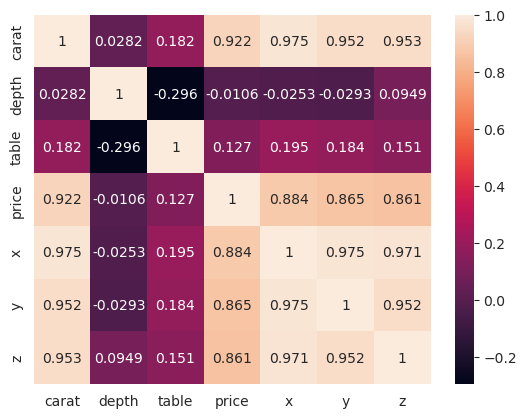

In [39]:
sns.heatmap(data_corr.corr(), annot=True, fmt=".3g")

In [13]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


d✅ Работаем с категориальными признаками. Закодируйте все категориальные признаки.

In [14]:
ohe = OneHotEncoder(sparse_output= True, drop= 'first')

In [15]:
data.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [16]:
X_object = data.select_dtypes(include='object')
ohe.fit(X_object)

OneHotEncoder(drop='first')

In [42]:
codes = ohe.transform(X_object).toarray()

In [43]:
codes

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [19]:
feature_names = ohe.get_feature_names_out(['cut', 'color', 'clarity'])
feature_names

array(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'], dtype=object)

In [20]:
data_coded = pd.concat([data.select_dtypes(exclude = "object"), pd.DataFrame(codes, columns = feature_names).astype(int)], axis = 1)

In [21]:
data_coded.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


✅ Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [22]:
Y = data_coded['price']
X = data_coded.drop('price', axis=1)

In [23]:
np.random.seed(10)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

✅ Отмасштабируйте вещественные признаки. Объясните почему это необходимо?

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


✅ Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [27]:
print("Train MSE: ", mean_squared_error(y_train, lin_reg.predict(X_train)))

Train MSE:  1268454.9559615592


In [28]:
print("Test MSE: ", mean_squared_error(y_test, lin_reg.predict(X_test)))

Test MSE:  1303126.7488467346


✅ Выведите полученные оценки коэффициентов LinearRegression. Проанализируйте полученные коэффициенты.

In [29]:
coef_df = pd.DataFrame(lin_reg.coef_, index = X.columns, columns = ['coef'])
coef_df.sort_values(by=['coef'])

,coef
x,-959.001979
color_J,-513.635437
color_I,-431.944388
color_H,-349.279490
z,-238.038613
color_G,-190.841862
color_F,-102.443444
color_E,-78.915265
depth,-73.111300
table,-67.588760


✅ Можно заметить из анализа корреляционной матрицы, что между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы мультиколлинеарности. 

Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. 

- Попробуйте провести регуляризацию модели, чтобы избавиться от данной проблемы: Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10.
- Сильно ли уменьшились веса?

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

In [30]:
lasso = linear_model.Lasso(alpha=10)
lasso.fit(X_train, y_train)
print("MSE train lasso:", mean_squared_error(y_train, lasso.predict(X_train)))
print("MSE test lasso:", mean_squared_error(y_test, lasso.predict(X_test)))

MSE train lasso: 1330335.8661404839
MSE test lasso: 1367367.0408547497


In [31]:
ridge = linear_model.Ridge(alpha=10)
ridge.fit(X_train, y_train)
print("MSE train ridge:", mean_squared_error(y_train, ridge.predict(X_train)))
print("MSE test ridge:", mean_squared_error(y_test, ridge.predict(X_test)))


MSE train ridge: 1268581.4112913974
MSE test ridge: 1303825.3625702378


In [32]:
coef_df_lasso = pd.DataFrame(lasso.coef_, index = X.columns, columns = ['coef_lasso'])
coef_df_lasso.sort_values(by=['coef_lasso'])

,coef_lasso
x,-488.898100
color_J,-453.057340
color_I,-360.543701
color_H,-275.572789
z,-194.282630
color_G,-112.156115
depth,-86.418657
table,-76.384212
color_F,-36.147716
color_E,-7.884083


In [33]:
coef_df_ridge = pd.DataFrame(ridge.coef_, index = X.columns, columns = ['coef_ridge'])
coef_df_ridge.sort_values(by=['coef_ridge'])

,coef_ridge
x,-906.609607
color_J,-512.295374
color_I,-430.678540
color_H,-348.399611
z,-247.347874
color_G,-190.282234
color_F,-102.265672
color_E,-78.503666
depth,-70.737168
table,-67.727091


✅ Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции  𝛼: 0.1, 1, 10, 100, 200 – обучите Lasso- и Ridge-регрессии. 

Понаблюдайте за изменением евклидовой нормы весов. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? 

In [34]:
alfas = [0.1, 1, 10, 100, 200]
lasso_e = []
ridge_e = []

In [35]:
for i in alfas:
    lasso = linear_model.Lasso(alpha=i)
    lasso.fit(X_train, y_train)
    lasso_e.append(np.linalg.norm(lasso.coef_))
    print(lasso_e)
    print('---------')
for i in alfas:
    ridge = linear_model.Ridge(alpha=i)
    ridge.fit(X_train, y_train)
    ridge_e.append(np.linalg.norm(ridge.coef_))
print(ridge_e)

[np.float64(6622.347890309657)]
---------
[np.float64(6622.347890309657), np.float64(6496.721036626877)]
---------
[np.float64(6622.347890309657), np.float64(6496.721036626877), np.float64(5346.090230121068)]
---------
[np.float64(6622.347890309657), np.float64(6496.721036626877), np.float64(5346.090230121068), np.float64(3844.5750308244583)]
---------
[np.float64(6622.347890309657), np.float64(6496.721036626877), np.float64(5346.090230121068), np.float64(3844.5750308244583), np.float64(3558.8214449838288)]
---------
[np.float64(6636.589561376101), np.float64(6629.894491270333), np.float64(6564.347717391291), np.float64(6015.400027042332), np.float64(5554.069324437333)]


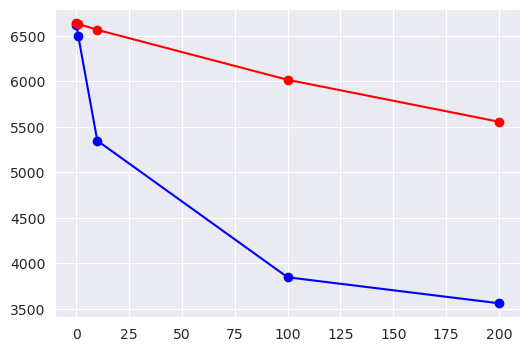

In [36]:
x = alfas
fig, ax = plt.subplots(figsize=(6, 4))
y1 = lasso_e
y2 = ridge_e
ax.plot(x, y1, label='Lasso', color='blue', marker='o')
ax.plot(x, y2, label='Ridge', color='red', marker='o')
ax.grid(True)

✅ В зависимости от значения параметра  𝛼 в Lasso-регрессии зануляются разные оценки коэффициентов. Подберите оптимальное значение коэффициента регуляризации по тренировочной выборке.

In [49]:
reg = LassoCV(cv=5, random_state=0, n_alphas = 10).fit(X_train, y_train)

reg_alph = reg.alphas_
reg_path = reg.mse_path_
a = []
for i in range(len(reg_path)):
    m = np.mean(reg_path[i])
    a.append(m)
dl = {"MSE_1": pd.Series(a), "alpha": pd.Series(reg_alph)}
df1 = pd.DataFrame(dl)
df1

,MSE_1,alpha
0,1.566133e+07,3652.239911
1,5.248532e+06,1695.219599
2,2.993146e+06,786.851236
3,2.496720e+06,365.223991
4,2.029796e+06,169.521960
5,1.702045e+06,78.685124
6,1.560325e+06,36.522399
7,1.421370e+06,16.952196
8,1.310760e+06,7.868512
9,1.280495e+06,3.652240


✅ Обучите итоговую Lasso-регрессию с выбранным параметром  𝛼
  на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

✅ Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии